In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import implementChannelLimit, fromHB5Table1, readHEPDataCsv, implementChannelWidthLimit
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit, validateChannelWidthLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `ggH > ZZ >4l/2l2nu` [2009.14791](https://arxiv.org/abs/2009.14791)

The width dependent ggF limits only start at 400GeV. We separately implement the NWA limits for lower masses.

/formswap/biekoetter/ipykernel_16254/2828815409.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(


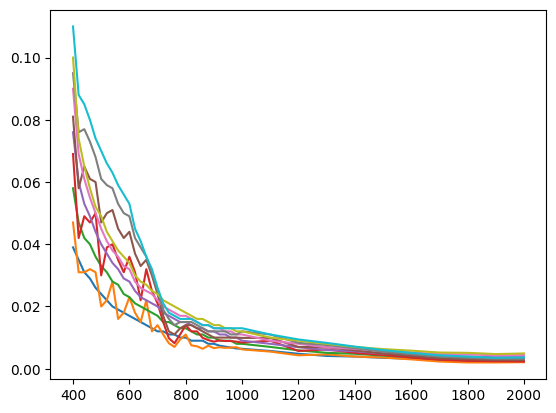

Looks good. Saving this to ggH_LHC13_ATLAS_139.json


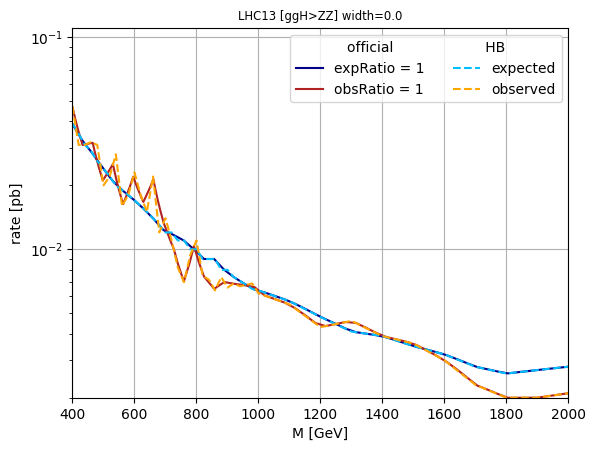

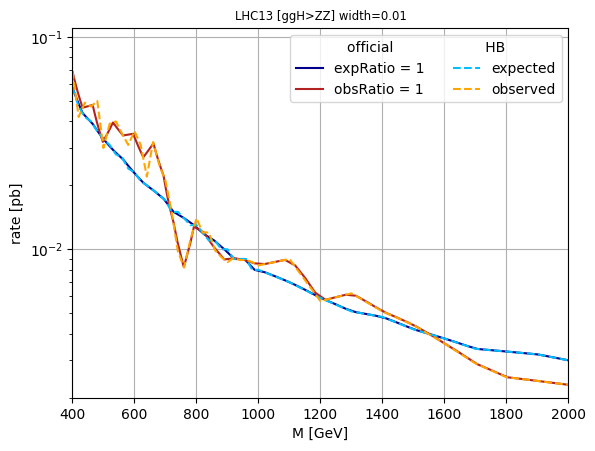

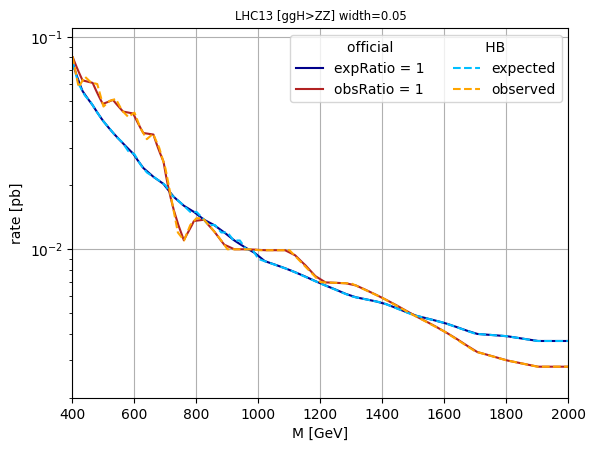

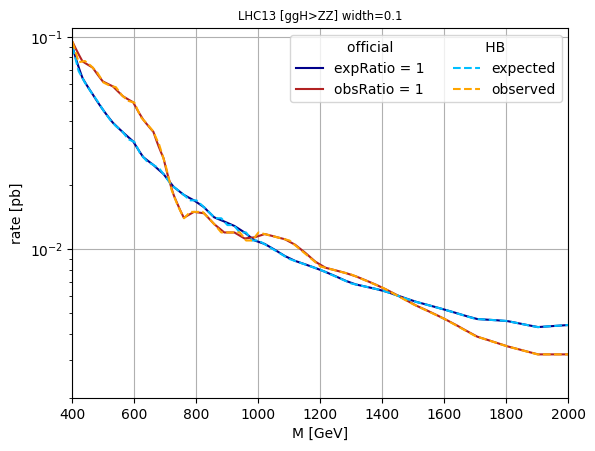

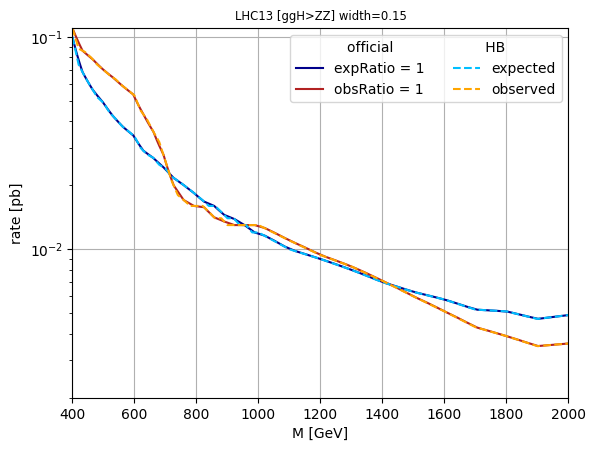

In [2]:
def readWidthTable(tableNum, normWidth):
    dfs = readHEPDataCsv(
        "https://www.hepdata.net/download/table/ins1820316/Table%{}/1/csv".format(
            tableNum
        )
    )
    dfs[0].rename(columns={"$m_H$ [GeV]": "m", "Observed [pb]": "obs"}, inplace=True)
    dfs[0]["exp"] = dfs[1]["Expected, +/-1sigma [pb]"]
    dfs[0]["normWidth"] = normWidth
    return dfs[0]


df = pd.concat(
    [
        readWidthTable(2012, 1e-2),
        readWidthTable(2013, 5e-2),
        readWidthTable(2014, 10e-2),
        readWidthTable(2015, 15e-2),
    ]
)
# add zero width limit in the region >=400GeV that the other limits cover
df = df.append(
    readWidthTable(2010, 0).set_index(["m"]).loc[np.unique(df.m)].reset_index()
)

limitFile = implementChannelWidthLimit(
    "2009.14791",
    {"channels": [["ggH", "ZZ"]]},
    "https://doi.org/10.17182/hepdata.97159",
    df,
    massResolution=resolution.ZZ["4l"],
    idSuffix=1,
)
lim = HB.Limit(limitFile)
validateChannelWidthLimit(lim)


## low-mass `ggH > ZZ >4l/2l2nu` [2009.14791](https://arxiv.org/abs/2009.14791)

This is the low mass range <400GeV that is only covered in the NWA limit.

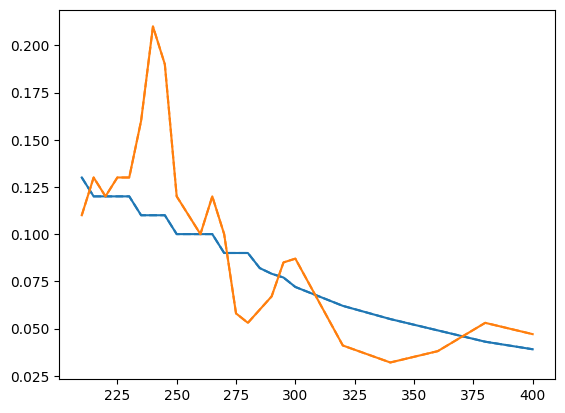

Looks good. Saving this to ggH_lowM_LHC13_ATLAS_139.json


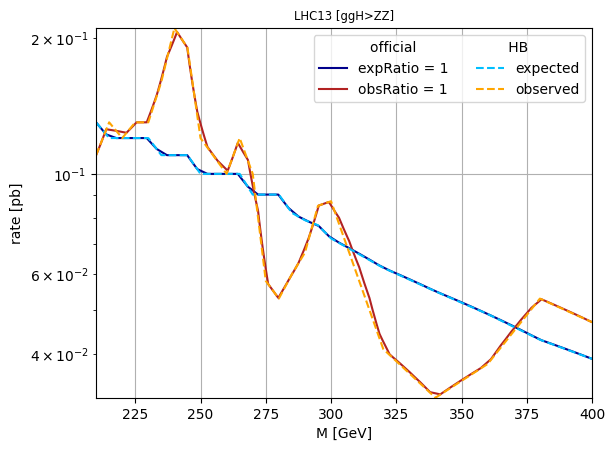

In [3]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1820316/Table%2010/1/csv"
)

df = dfs[0].rename(columns={"$m_H$ [GeV]": "m", "Observed [pb]": "obs"})
df["exp"] = dfs[1]["Expected, +/-1sigma [pb]"]
df = df.loc[df.m <= 400]

limitFile = implementChannelLimit(
    "2009.14791",
    {"channels": [["ggH", "ZZ"]]},
    "https://doi.org/10.17182/hepdata.97159",
    df,
    massResolution=resolution.ZZ["4l"],
    idSuffix=2,
    prefix="ggH_lowM",
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `vbfH > ZZ >4l/2l2nu` [2009.14791](https://arxiv.org/abs/2009.14791)

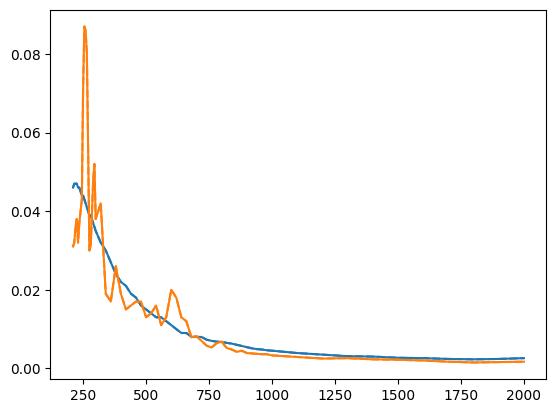

Looks good. Saving this to vbfH_LHC13_ATLAS_139.json


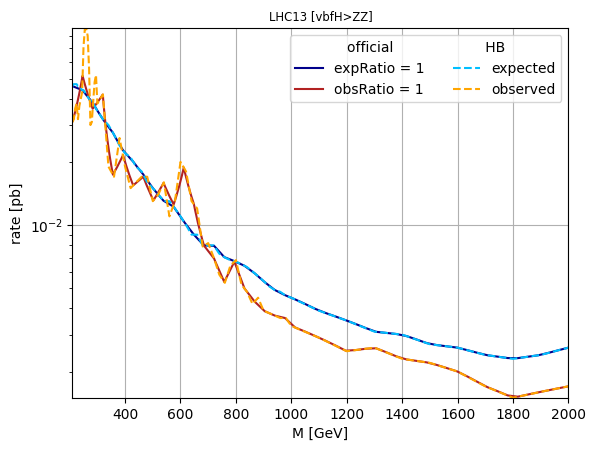

In [4]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1820316/Table%2011/1/csv"
)

df = dfs[0].rename(columns={"$m_H$ [GeV]": "m", "Observed [pb]": "obs"})
df["exp"] = dfs[1]["Expected, +/-1sigma [pb]"]

limitFile = implementChannelLimit(
    "2009.14791",
    {"channels": [["vbfH", "ZZ"]]},
    "https://doi.org/10.17182/hepdata.97159",
    df,
    massResolution=resolution.ZZ["4l"],
    idSuffix=3,
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `vbfH > ZZ` 13 TeV [1708.09638](https://arxiv.org/abs/1708.09638)

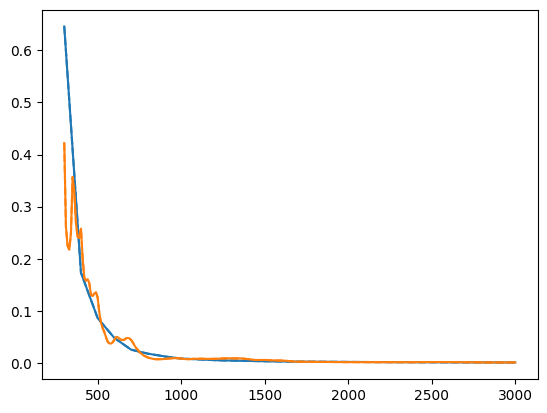

Looks good. Saving this to vbfH_LHC13_ATLAS_36.json


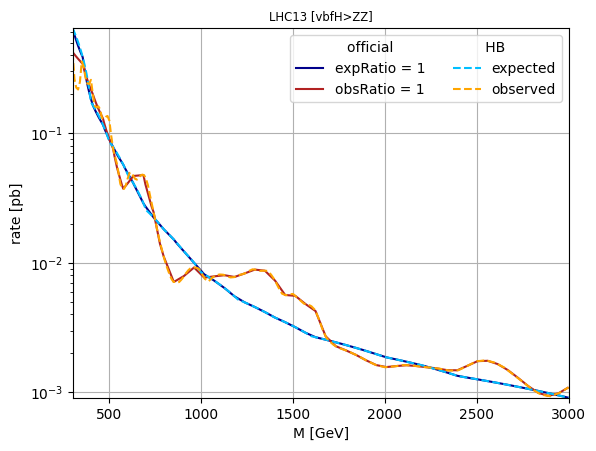

In [5]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1620910/Table%2012/1/csv", skip=1
)
df = dfs[0].rename(
    columns={"Mass [TeV]": "m", "Cross section upper limit at 95% CL [pb]": "obs"}
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]
df.m *= 1e3


limitFile = implementChannelLimit(
    "1708.09638",
    {"channels": [["vbfH", "ZZ"]]},
    "https://doi.org/10.17182/hepdata.78550.v1/t12",
    df,
    idSuffix=1,
    massResolution=resolution.ZZ["4l"],  # they quote 2-3% on p 12
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `ggH > ZZ` 13 TeV [1708.09638](https://arxiv.org/abs/1708.09638)

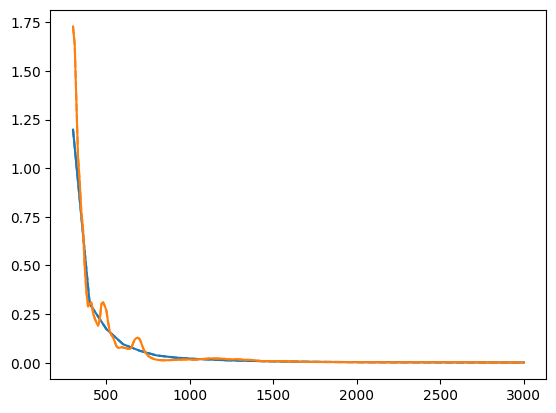

Looks good. Saving this to ggH_LHC13_ATLAS_36.json


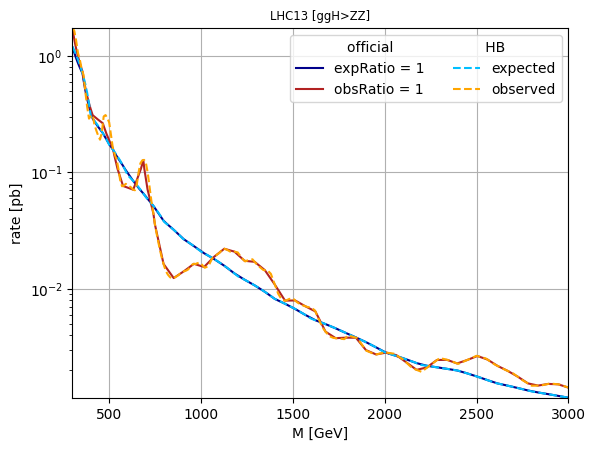

In [6]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1620910/Table%2011/1/csv",
    skip=1
)
df = dfs[0].rename(
    columns={"Mass [TeV]": "m", "Cross section upper limit at 95% CL [pb]": "obs"}
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]
df.m *= 1e+3

limitFile = implementChannelLimit(
    "1708.09638",
    {"channels": [["ggH", "ZZ"]]},
    "https://doi.org/10.17182/hepdata.78550.v1/t11",
    df,
    idSuffix=2,
    massResolution=resolution.ZZ["4l"], # they quote 2-3% on p 12
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)

# ATLAS 8TeV LHC

## `pp > H > ZZ` 8TeV [1507.05930](https://arxiv.org/abs/1507.05930)

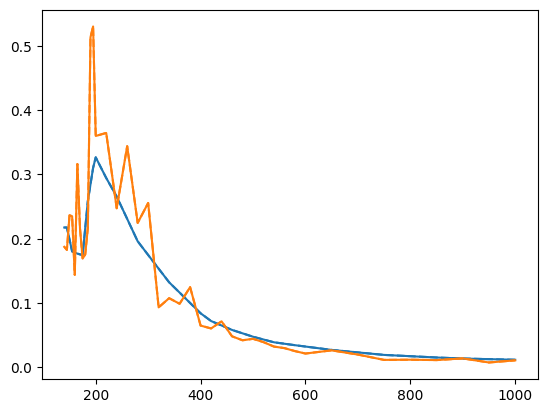

Looks good. Saving this to H_LHC8_ATLAS_20.json


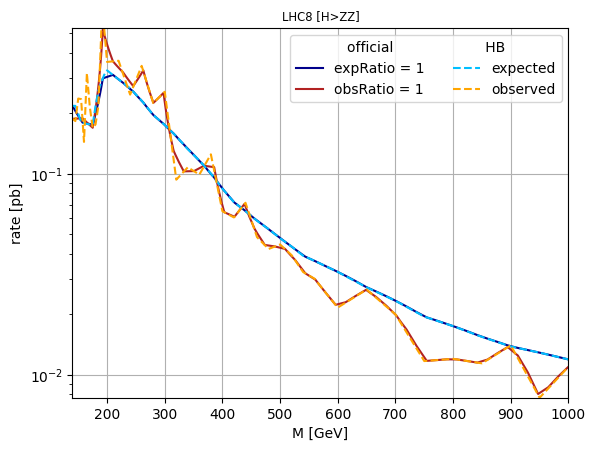

In [7]:
df = fromHB5Table1("05930_Atlas_gg-H-ZZ-20.3fb-1", "ATLAS")
limitFile = implementChannelLimit(
    "1507.05930",
    {"channels": [["H", "ZZ"]]},
    "Fig. 12a",
    df,
    idSuffix=1,
    massResolution=resolution.ZZ["4l"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `vbfH > ZZ` 8TeV [1507.05930](https://arxiv.org/abs/1507.05930)

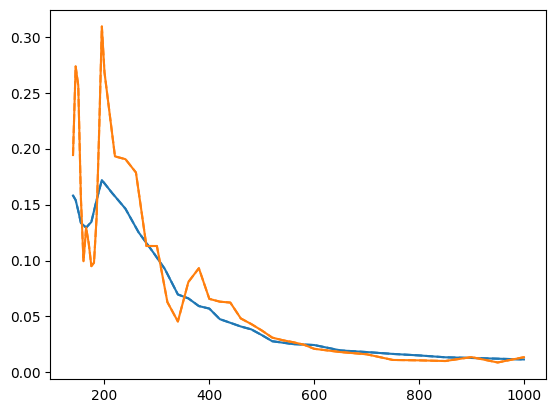

Looks good. Saving this to vbfH_LHC8_ATLAS_20.json


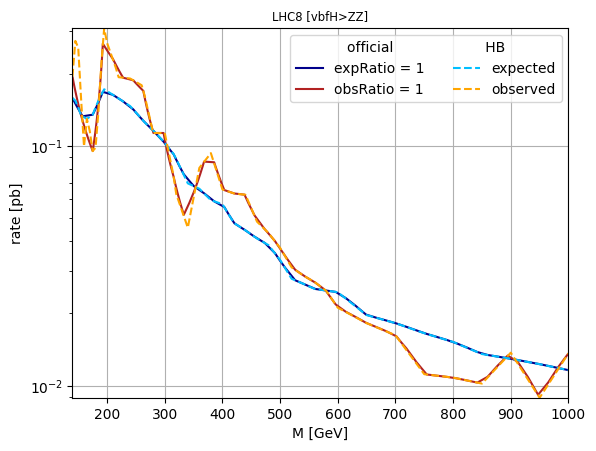

In [8]:
df = fromHB5Table1("05930_Atlas_VBF-H-ZZ-20.3fb-1", "ATLAS")
limitFile = implementChannelLimit(
    "1507.05930",
    {"channels": [["vbfH", "ZZ"]]},
    "Fig. 12b",
    df,
    idSuffix=2,
    massResolution=resolution.ZZ["4l"],
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `H > ZZ > 4l` [ATLAS-CONF-2013-013](https://inspirehep.net/literature/1229969)

No arxiv eprint found.
Multiple different luminosity values: [20.7, 4.6] using 20.7 unless you set it manually


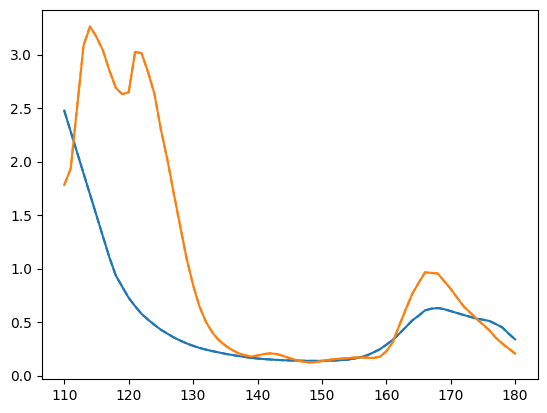

Looks good. Saving this to comb_LHC8_ATLAS_25.json
using effective coupling input for SM-normalized limit


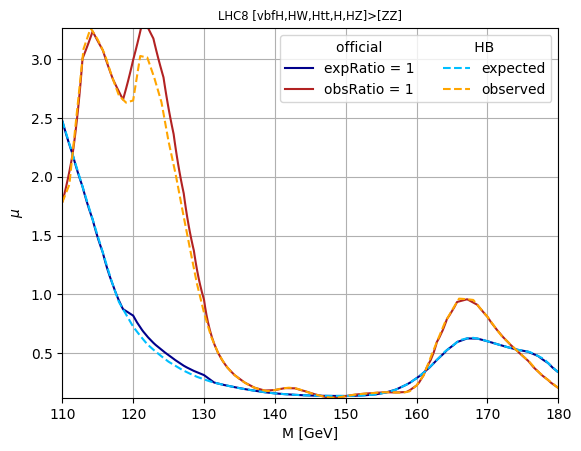

In [9]:
df = fromHB5Table1("2013013-1_Atlas_H-ZZ-4l_incl_25fb-1", "ATLAS")

limitFile = implementChannelLimit(
    "1229969",
    {"channels": [[p, "ZZ"] for p in ["H", "vbfH", "HZ", "HW", "Htt"]]},
    "Fig. 7",
    df,
    idSuffix=1,
    luminosity=4.6 + 20.7,
    massResolution=resolution.ZZ["4l"],
    normalization={"reference": "SMHiggsInterp", "process": "signal"},
    constraints={"modelLike": "SMHiggsInterp", "process": "signal"},
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)
